In [32]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!ls ../unzippedData

bom.movie_gross.csv  rt.movie_info.tsv    tmdb.movies.csv
im.db                rt.reviews.tsv       tn.movie_budgets.csv


In [13]:
conn = sqlite3.connect('../unzippedData/im.db')

In [14]:
imdb_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)

imdb_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [15]:
# Function for Cleaning Column headers

def clean_column_headers(dataframe):
    dataframe.columns = dataframe.columns.str.title()
    dataframe.columns = dataframe.columns.str.replace("_", " ")

In [16]:
# Function for cleaning comma seperated string values of a series into list of strings. Accepts one series.

def clean_comma_series(Series):
    Series = Series.str.replace("_", " ")
    Series = Series.str.title()
    Series = Series.str.split(",")
    return Series

In [17]:
cursor = conn.cursor()

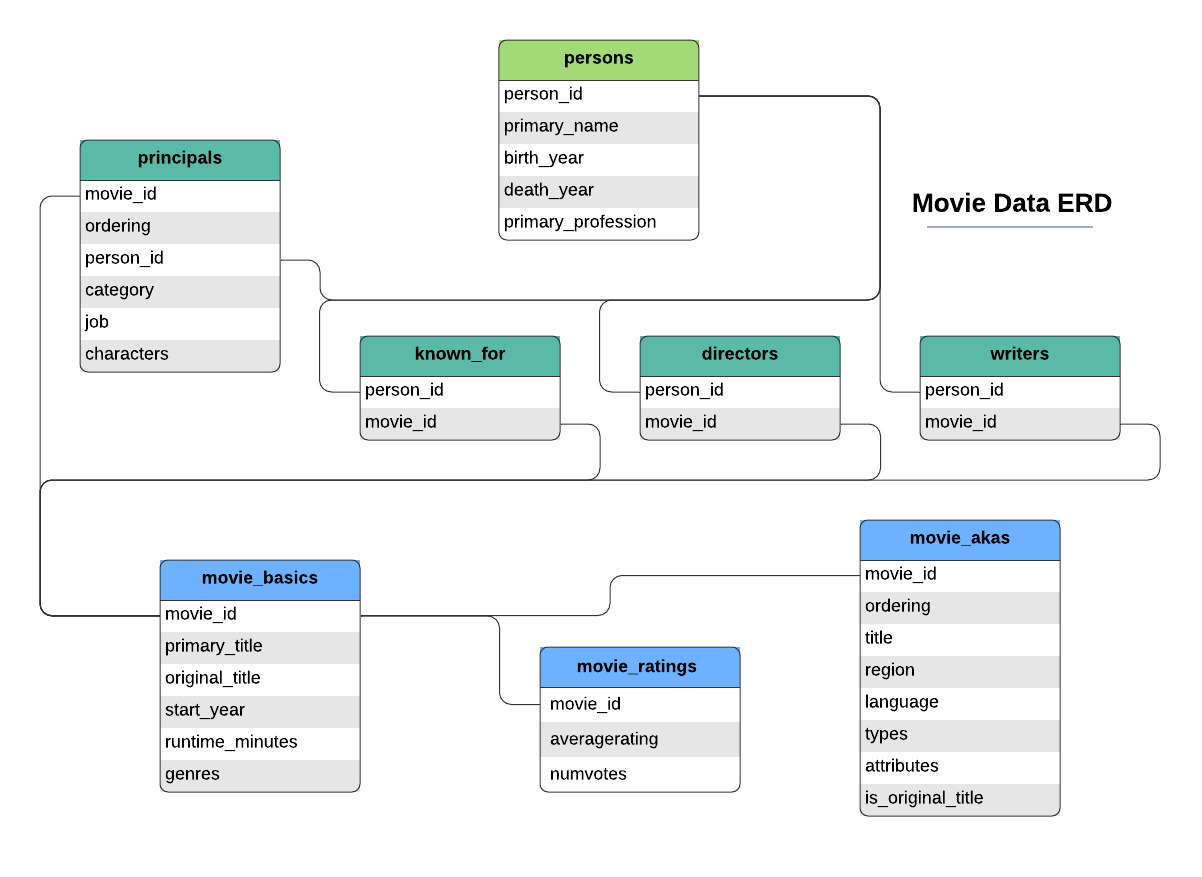

In [19]:
imdb_genres_sql = pd.read_sql('''

SELECT *
FROM movie_basics

''', conn)

In [21]:
imdb_genres_df = pd.DataFrame(imdb_genres_sql)

In [24]:
imdb_genres_df['genres'].value_counts()[:30]

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Animation                          828
Drama,Family                       784
Action,Crime,Drama                 727
Comedy,Horror                      724
Crime,Drama                        723
Crime                    

In [31]:
horror = imdb_genres_df.loc[imdb_genres_df['genres'] == 'Horror']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
51,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror
129,tt0451154,The Passing,The Passing,2011,92.0,Horror
130,tt0451201,Clawed,Sludge,2017,95.0,Horror
153,tt0462516,Satan Hates You,Satan Hates You,2010,94.0,Horror
411,tt0884325,Drain Baby,Drain Baby,2011,NaN,Horror
...,...,...,...,...,...,...
146017,tt9898682,Vengeance Douloureuse 1: la colère est née,Vengeance Douloureuse 1: la colère est née,2011,76.0,Horror
146033,tt9900552,The Sacred Riana: Beginning,The Sacred Riana: Beginning,2019,111.0,Horror
146054,tt9903890,The Curse of EVE,The Curse of EVE,2019,107.0,Horror
146064,tt9904820,American Terror Story,American Terror Story,2019,76.0,Horror
